In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import numpy as np

In [2]:
datadir = '/gws/nopw/j04/acsis/jmecking/CMIP6/composites/'
figdir  = 'jet_figures/210812'

EXP          = 'piControl'
var_ts       = 'max_lats'
#var_ts       = 'max_wind'
var_field    = 'tos_-80to-30E_25to50N'
var          = 'tos'
season_ts    = 'DJF'
 
infile = (datadir + EXP + '_' + var_ts + '-' + season_ts + '_' + var_field + '_std.nc')

p_models  = ['CESM2-FV2_r1i1p1f1', 'NESM3_r1i1p1f1'] # Problem with these models - need to investigate!

#plot_lag = 0
plot_lag = -99

In [3]:
# Read in information:

ncid   = Dataset(infile,'r')
lags   = ncid.variables['lags'][:]
models = ncid.variables['models'][:]
data_mean = ncid.variables['mean'][:,:]
data_min0 = ncid.variables['min_std0'][:,:,:]
data_max0 = ncid.variables['max_std0'][:,:,:]
data_min1 = ncid.variables['min_std1'][:,:,:]
data_max1 = ncid.variables['max_std1'][:,:,:]
ncid.close()

nm = len(models)
nl = np.size(lags)

# Reshape and redefine lags to be months since middle of season:
lags = lags*12
lags = np.tile(lags,(12,1)).T
for mm in range(0,12):
    lags[:,mm] = lags[:,mm] + mm
lags = np.ndarray.flatten(lags)
if season_ts == 'DJF':
    lags = lags - 1

data_min0 = np.reshape(data_min0,(len(models),nl*12))
data_max0 = np.reshape(data_max0,(len(models),nl*12))
data_min1 = np.reshape(data_min1,(len(models),nl*12))
data_max1 = np.reshape(data_max1,(len(models),nl*12))

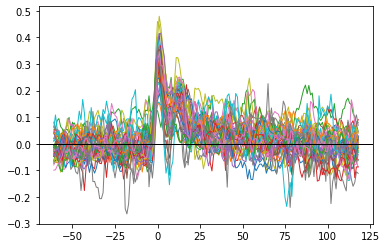

In [4]:
for mm in range(0,nm):
    plt.plot(lags,data_max1[mm,:] -data_min1[mm,:] ,lw=1)

plt.plot(lags,np.mean(data_max1-data_min1,axis=0),lw=3,color='k')

plt.axhline(y=0,color='k',lw=1)

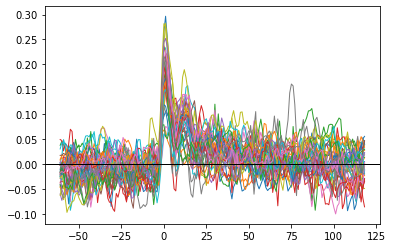

In [5]:
for mm in range(0,nm):
    plt.plot(lags,data_max0[mm,:] -data_min0[mm,:] ,lw=1)

plt.plot(lags,np.mean(data_max0-data_min0,axis=0),lw=3,color='k')

plt.axhline(y=0,color='k',lw=1)

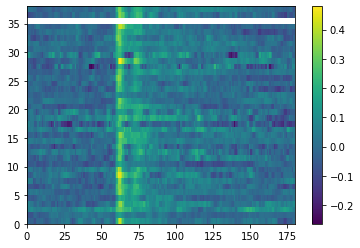

In [6]:
plt.pcolormesh(data_max1-data_min1)
plt.colorbar()